In [93]:
import pandas as pd
import numpy as np
import os

In [94]:
df = pd.read_csv(os.getcwd()+"\dataset/train.csv")

In [95]:
df

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C


In [96]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [97]:
#Cabin - много пропущенных значений
#Age - рассмотрим эти данные

In [98]:
df["Age"].unique()

array([22.  , 38.  , 26.  , 35.  ,   nan, 54.  ,  2.  , 27.  , 14.  ,
        4.  , 58.  , 20.  , 39.  , 55.  , 31.  , 34.  , 15.  , 28.  ,
        8.  , 19.  , 40.  , 66.  , 42.  , 21.  , 18.  ,  3.  ,  7.  ,
       49.  , 29.  , 65.  , 28.5 ,  5.  , 11.  , 45.  , 17.  , 32.  ,
       16.  , 25.  ,  0.83, 30.  , 33.  , 23.  , 24.  , 46.  , 59.  ,
       71.  , 37.  , 47.  , 14.5 , 70.5 , 32.5 , 12.  ,  9.  , 36.5 ,
       51.  , 55.5 , 40.5 , 44.  ,  1.  , 61.  , 56.  , 50.  , 36.  ,
       45.5 , 20.5 , 62.  , 41.  , 52.  , 63.  , 23.5 ,  0.92, 43.  ,
       60.  , 10.  , 64.  , 13.  , 48.  ,  0.75, 53.  , 57.  , 80.  ,
       70.  , 24.5 ,  6.  ,  0.67, 30.5 ,  0.42, 34.5 , 74.  ])

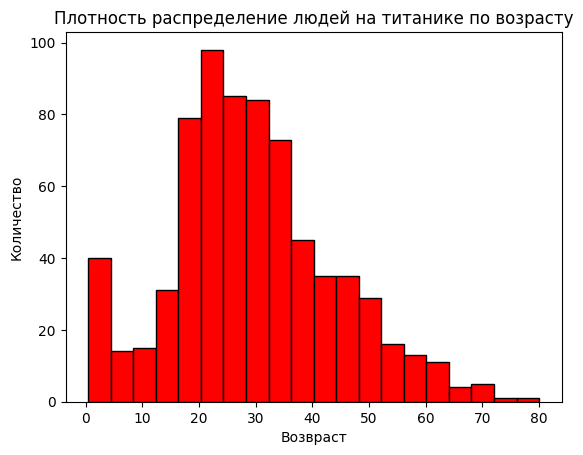

In [99]:
import matplotlib.pyplot as plt
plt.hist(df["Age"], color="red", edgecolor="black", bins=100//5)
plt.title("Плотность распределение людей на титанике по возрасту")
plt.xlabel("Возвраст")
plt.ylabel("Количество")
plt.show()

In [100]:
#Больше похоже на распределение пуассона
#Посмотрим на тоже распределение только отфильтруем на выживших

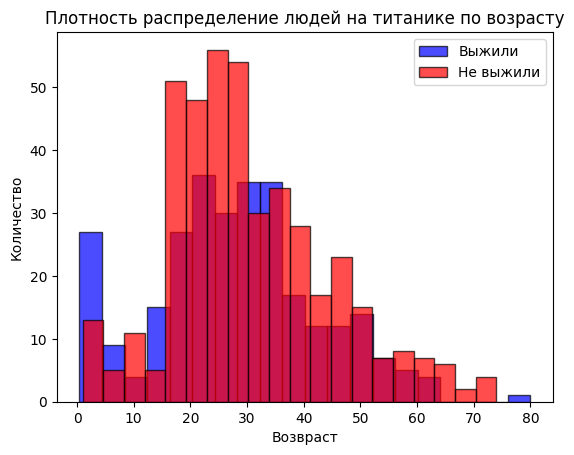

In [101]:
plt.hist(df[df["Survived"] == 1]["Age"], color="blue", edgecolor="black", bins=100//5, alpha = 0.7, label="Выжили")
plt.hist(df[df["Survived"] == 0]["Age"], color="red", edgecolor="black", bins=100//5, alpha = 0.7, label="Не выжили")
plt.title("Плотность распределение людей на титанике по возрасту")
plt.xlabel("Возвраст")
plt.ylabel("Количество")
plt.legend()
plt.show()

In [102]:
#Пуассон есть Пуассон

In [103]:
#Выдвинем гипотезу, что результат погибших зависет от количества родственников на корабле

In [104]:
df["SibSp"].unique(), df["Parch"].unique()

(array([1, 0, 3, 4, 2, 5, 8], dtype=int64),
 array([0, 1, 2, 5, 3, 4, 6], dtype=int64))

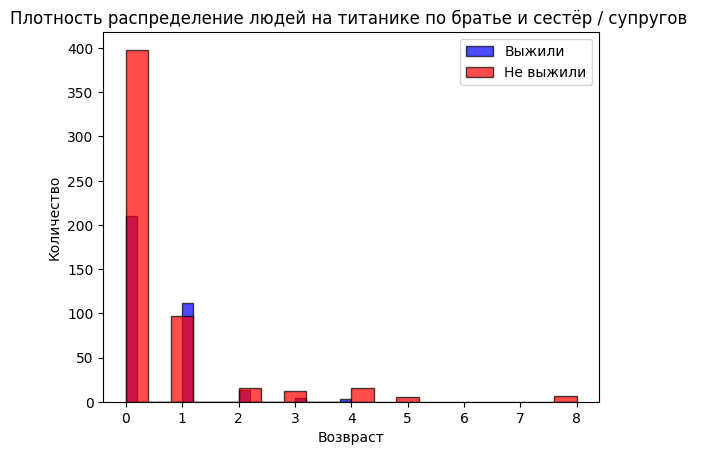

In [105]:
plt.hist(df[df["Survived"] == 1]["SibSp"], color="blue", edgecolor="black", bins=100//5, alpha = 0.7, label="Выжили")
plt.hist(df[df["Survived"] == 0]["SibSp"], color="red", edgecolor="black", bins=100//5, alpha = 0.7, label="Не выжили")
plt.title("Плотность распределение людей на титанике по братье и сестёр / супругов ")
plt.xlabel("Возвраст")
plt.ylabel("Количество")
plt.legend()
plt.show()

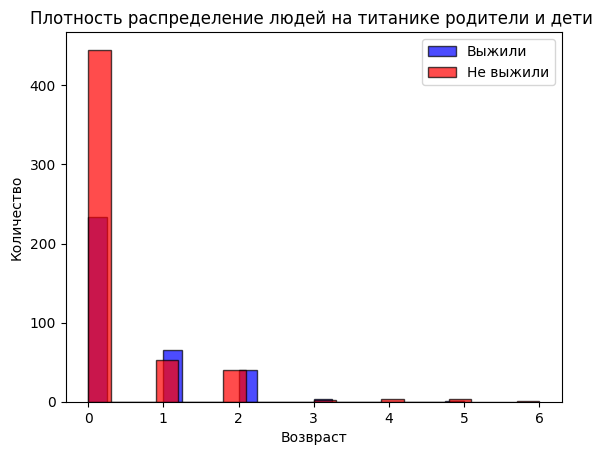

In [106]:
plt.hist(df[df["Survived"] == 1]["Parch"], color="blue", edgecolor="black", bins=100//5, alpha = 0.7, label="Выжили")
plt.hist(df[df["Survived"] == 0]["Parch"], color="red", edgecolor="black", bins=100//5, alpha = 0.7, label="Не выжили")
plt.title("Плотность распределение людей на титанике родители и дети ")
plt.xlabel("Возвраст")
plt.ylabel("Количество")
plt.legend()
plt.show()

In [107]:
df["Cabin"].unique()

array([nan, 'C85', 'C123', 'E46', 'G6', 'C103', 'D56', 'A6',
       'C23 C25 C27', 'B78', 'D33', 'B30', 'C52', 'B28', 'C83', 'F33',
       'F G73', 'E31', 'A5', 'D10 D12', 'D26', 'C110', 'B58 B60', 'E101',
       'F E69', 'D47', 'B86', 'F2', 'C2', 'E33', 'B19', 'A7', 'C49', 'F4',
       'A32', 'B4', 'B80', 'A31', 'D36', 'D15', 'C93', 'C78', 'D35',
       'C87', 'B77', 'E67', 'B94', 'C125', 'C99', 'C118', 'D7', 'A19',
       'B49', 'D', 'C22 C26', 'C106', 'C65', 'E36', 'C54',
       'B57 B59 B63 B66', 'C7', 'E34', 'C32', 'B18', 'C124', 'C91', 'E40',
       'T', 'C128', 'D37', 'B35', 'E50', 'C82', 'B96 B98', 'E10', 'E44',
       'A34', 'C104', 'C111', 'C92', 'E38', 'D21', 'E12', 'E63', 'A14',
       'B37', 'C30', 'D20', 'B79', 'E25', 'D46', 'B73', 'C95', 'B38',
       'B39', 'B22', 'C86', 'C70', 'A16', 'C101', 'C68', 'A10', 'E68',
       'B41', 'A20', 'D19', 'D50', 'D9', 'A23', 'B50', 'A26', 'D48',
       'E58', 'C126', 'B71', 'B51 B53 B55', 'D49', 'B5', 'B20', 'F G63',
       'C62 C64',

In [108]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


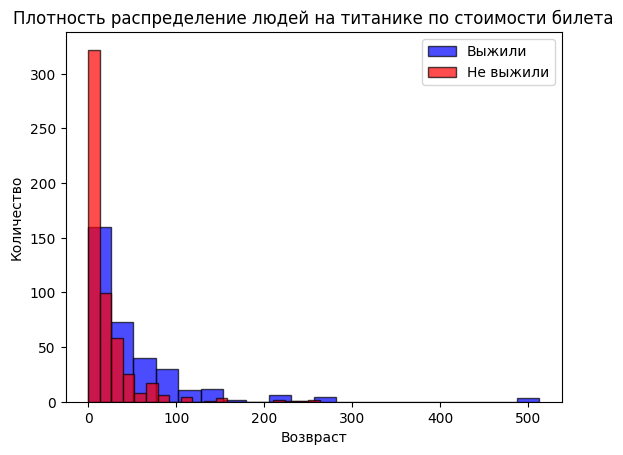

In [109]:
plt.hist(df[df["Survived"] == 1]["Fare"], color="blue", edgecolor="black", bins=100//5, alpha = 0.7, label="Выжили")
plt.hist(df[df["Survived"] == 0]["Fare"], color="red", edgecolor="black", bins=100//5, alpha = 0.7, label="Не выжили")
plt.title("Плотность распределение людей на титанике по стоимости билета")
plt.xlabel("Возвраст")
plt.ylabel("Количество")
plt.legend()
plt.show()

In [110]:
#Вон там мужик выжил. Справа ->>

In [111]:
#По результатам исследования. Откинем столбцы Name, PassengerId

In [112]:
#А ещё можно было бы поисследовать номера кабин. Зависимость там определенно есть. Исследовать этот момент не хочется. Откинем

In [115]:
df.drop(["Name", "PassengerId", "Cabin"], axis=1, inplace=True)

In [116]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 9 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Survived  891 non-null    int64  
 1   Pclass    891 non-null    int64  
 2   Sex       891 non-null    object 
 3   Age       714 non-null    float64
 4   SibSp     891 non-null    int64  
 5   Parch     891 non-null    int64  
 6   Ticket    891 non-null    object 
 7   Fare      891 non-null    float64
 8   Embarked  889 non-null    object 
dtypes: float64(2), int64(4), object(3)
memory usage: 62.8+ KB


In [ ]:
#Вернемся в возрасту. Заполним его медианным значением

In [121]:
df.fillna({"Age": df["Age"].median()}, inplace=True)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 9 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Survived  891 non-null    int64  
 1   Pclass    891 non-null    int64  
 2   Sex       891 non-null    object 
 3   Age       891 non-null    float64
 4   SibSp     891 non-null    int64  
 5   Parch     891 non-null    int64  
 6   Ticket    891 non-null    object 
 7   Fare      891 non-null    float64
 8   Embarked  889 non-null    object 
dtypes: float64(2), int64(4), object(3)
memory usage: 62.8+ KB


In [122]:
df.dropna(inplace= True)

In [123]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 889 entries, 0 to 890
Data columns (total 9 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Survived  889 non-null    int64  
 1   Pclass    889 non-null    int64  
 2   Sex       889 non-null    object 
 3   Age       889 non-null    float64
 4   SibSp     889 non-null    int64  
 5   Parch     889 non-null    int64  
 6   Ticket    889 non-null    object 
 7   Fare      889 non-null    float64
 8   Embarked  889 non-null    object 
dtypes: float64(2), int64(4), object(3)
memory usage: 69.5+ KB


In [124]:
#Получилось красиво. Теперь важно изменить категориальные признаки и целочисленные. Для лучшего понимания и схождения моделей машинного обучения